In [1]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.lines as mlines
from matplotlib.animation import FuncAnimation
import random

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

from sklearn.linear_model import LinearRegression




In [2]:
# This allows animations to run directly in the notebook, but it also changes the back end in strange ways.
# For example, with this enabled the anim function doesn't have to return anything even with blitting set to True
# I don't know what's going on behind the scenes here.
# All the code here shoudl run fine without it.

%matplotlib notebook 


In [3]:
# set dpi for saves
dpi = 300

## Animations for:
* [Regression](#reg)
* [Calculus](#calc)
* [Interpolation](#int)

### Regression animations <a class="anchor" id="reg"></a>

The animation below is intended to demonstrate how the sum of residuals is the same for every straight line drawn through the midpoint of a set of 2D data points.

<IPython.core.display.Javascript object>


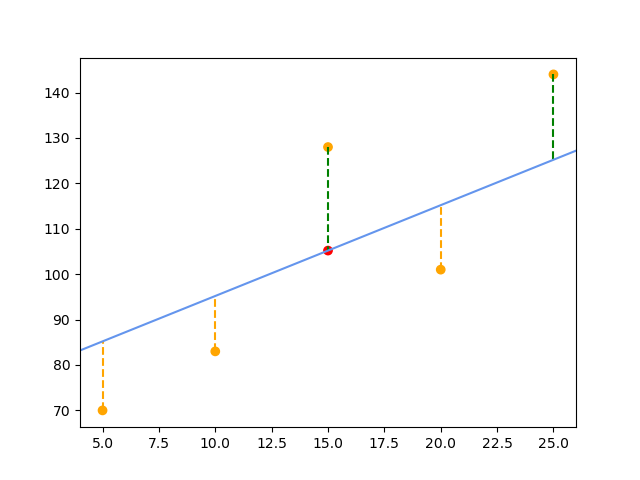

In [4]:
x = [5,10,15,20,25,15]
y = [70, 83, 128, 101, 144, 105.2]

fig = plt.figure()
ax = plt.axes()

lines = []

colors = ("orange", "orange", "orange", "orange", "orange", "red")
ax.scatter(x,y, c = colors)
line_main_x = np.linspace(0,30,100)

def init():    
    for index in range(5):
        lobj = ax.plot([],[],'orange', linestyle = '--')[0]
        lines.append(lobj)
    lobj = ax.plot([],[],'cornflowerblue')[0]
    lines.append(lobj)
    return lines
    

def animate(i):
    line_main_y = y[-1] +(line_main_x-15)*(i-30)*0.1
    for j in range(5):
        x_values = [x[j],x[j]]
        y_values = [y[j],y[-1] +(x[j]-15)*(i-30)*0.1]
        if y_values[0] > y_values[1]:
            lines[j].set_data(x_values, y_values)
            lines[j].set_color('green')
        else:
            lines[j].set_data(x_values, y_values) 
            lines[j].set_color('orange')
    lines[5].set_data(line_main_x,line_main_y)
    return lines

    
    
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=70, interval=70, blit=True)

# anim.save('line_through_midpoint.gif', writer='ffmpeg', dpi=dpi)


The next animation is intended to demonstrate how using the absolute values of residuals may not produce a unique line in some cases.

<IPython.core.display.Javascript object>


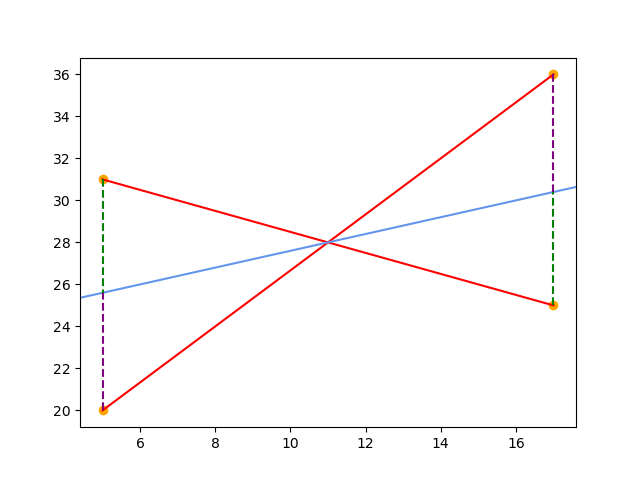

In [5]:
x = [5,5,17,17]
y = [20, 31, 25, 36]
intersection = [11, 28]

fig, ax = plt.subplots() 
lines = []
line_main_x = np.linspace(0,20,100)



colors = ("orange")
ax.scatter(x,y, c = colors)

def init():
    for index in range(7):
        lobj = ax.plot([],[],'orange', linestyle = '--')[0]
        lines.append(lobj)
    lines[0].set_data([x[0],x[3]],[y[0],y[3]])
    lines[0].set_color('red')
    lines[0].set_linestyle('solid')
    lines[1].set_data([x[1],x[2]],[y[1],y[2]])
    lines[1].set_color('red')
    lines[1].set_linestyle('solid')
    lines[2].set_color('cornflowerblue')
    lines[2].set_linestyle('solid')
    lines[3].set_color('purple')
    lines[4].set_color('green')
    lines[5].set_color('green')
    lines[6].set_color('purple')
    return lines
    

def animate(i):    
    line_main_y = 28 +(line_main_x-11)*(i-10)*0.02 
    lines[2].set_data(line_main_x,line_main_y)
    lines[3].set_data([x[0],x[0]], [y[0],28 +(x[0]-11)*(i-10)*0.02])    
    lines[4].set_data([x[1],x[1]], [y[1],28 +(x[1]-11)*(i-10)*0.02])    
    lines[5].set_data([x[2],x[2]], [y[2],28 +(x[2]-11)*(i-10)*0.02])    
    lines[6].set_data([x[3],x[3]], [y[3],28 +(x[3]-11)*(i-10)*0.02])
    return lines


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=70, interval=70, blit=True)


# anim.save('absolute_not_unique.gif', writer='ffmpeg', dpi=dpi)

The following animation demonstrates a best fit line drawn by minimizing the maximal residual.

<IPython.core.display.Javascript object>


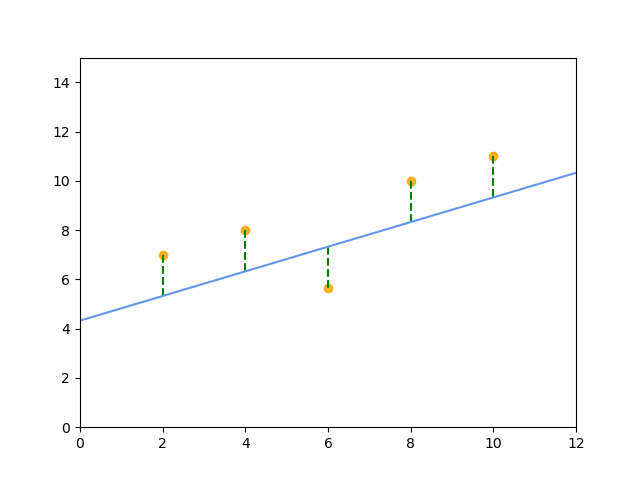

In [6]:
fig, ax = plt.subplots() 
y_value = 8
x = [2,4,6,8,10]
y = [7,8,y_value,10,11]
plt.ylim((0,15))
plt.xlim((0,12))
sc = ax.scatter(x, y, c='orange', alpha=0.85)

lines = []

    
def init():
    for index in range(6):
        lobj = ax.plot([],[])[0]
        lobj.set_color('green')
        lobj.set_linestyle('--')
        lobj.set_drawstyle('default')
        lines.append(lobj)
    lines[5].set_color('cornflowerblue')
    lines[5].set_linestyle('solid')
    lines[5].set_drawstyle('default')
    return lines
    
    
def animate(i):
    line_main_x = np.linspace(0,12,100)
    line_main_y = 6-(1+i*0.05/2) + .5*line_main_x
    offsets = [[2,7],[4,8],[6,7-i*0.05], [8,10], [10,11]]
    sc.set_offsets(offsets)
    lines[5].set_data(line_main_x,line_main_y)
    lines[0].set_data([2,2], [7,6-i*0.05/2])
    lines[1].set_data([4,4], [8,7-i*0.05/2])
    lines[2].set_data([6,6], [8-i*0.05/2, 7 - i*0.05])
    lines[3].set_data([8,8], [10,9-i*0.05/2])
    lines[4].set_data([10,10], [11,10-i*0.05/2])
    return lines
        
anim = FuncAnimation(fig, animate, init_func=init, frames=70, interval=70, blit=True)


# anim.save('minimizing_max_residual.gif', writer='ffmpeg', dpi=dpi)

Below shows points generated by a normal distribution around a line, which is intended to illustrate the principle behind MLE.

<IPython.core.display.Javascript object>


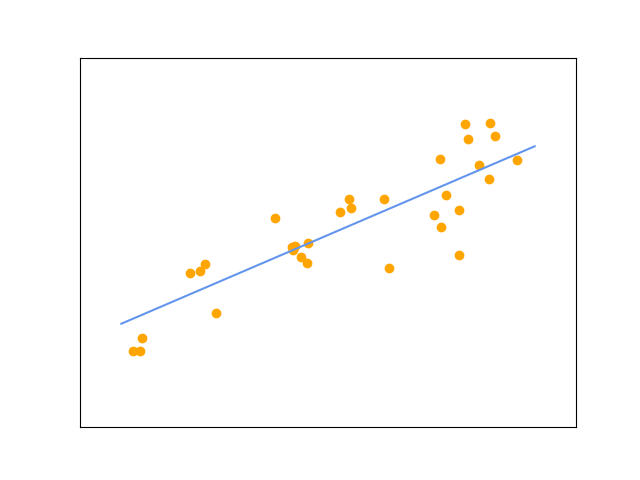

In [7]:
fig, ax = plt.subplots() 
n = 100
a0 = 7
a1 = 0.6
X1 = [random.uniform(0,20) for i in range(n)]
offsets = [random.gauss(0, 2) for i in range(n)]
Y1 = []
for i in range(n):
    Y1.append(a0 + a1*X1[i] + offsets[i])
    
line_x = np.linspace(0,20,100)
line_y = a0 +a1*line_x
ax.plot(line_x,line_y, c = 'cornflowerblue')  
ax.set_xlim(-2, 22)
ax.set_ylim(0, 25)
plt.tick_params(
    axis='both',          
    which='both',     
    bottom=False,      
    top=False,  
    left = False, 
    labelbottom=False,
    labelleft = False)

def animate(i):
    ax.collections.clear()
    X = X1[:i]
    Y = Y1[:i]
    ax.scatter(X,Y, c = 'orange')

# no blitting here because it's easier to just redraw the whole scatter plot
anim = FuncAnimation(fig, animate, frames=n, interval=70, blit=False)
# anim.save('MLE_regression.gif',writer='ffmpeg',dpi=dpi)

The next animation illustrates the best fit plane in 2D regression.

<IPython.core.display.Javascript object>


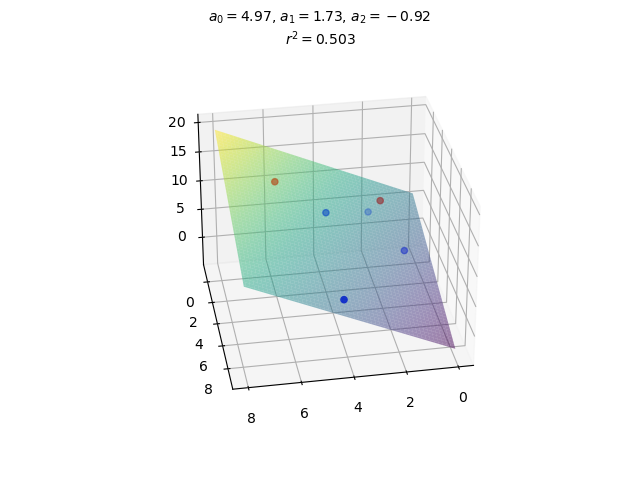

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X_1 = [2,2,4,1,4,6]
X_2 = [0,3,2,3,7,2]
Y = [5,12,9,3,3,15]

X_1 = np.array(X_1)
X_2 = np.array(X_2)

X_1 = np.expand_dims(X_1, axis = 1)
X_2 = np.expand_dims(X_2, axis = 1)


X = np.concatenate((X_1,X_2), axis = 1)

model = LinearRegression()

model.fit(X,Y)

parameters = np.append(model.intercept_, model.coef_)
r2 = round(model.score(X, Y),3)

x_line = np.linspace(min(X_1)-1, max(X_1) + 2, 100)
y_line = np.linspace(min(X_2)-1, max(X_2) + 2, 100)    
X_line, Y_line = np.meshgrid(x_line, y_line)
Z = parameters[0] + X_line*parameters[1] + Y_line*parameters[2]

colours =[]
for i in range(len(X_1)):
    if Y[i] > parameters[0] + X_1[i]*parameters[1] + X_2[i]*parameters[2]:
        colours.append('red')
    else:
        colours.append('blue')
        
sc = ax.scatter(X_1, X_2, Y, marker = 'o', c = colours)
ax.plot_surface(X_line, Y_line, Z, cmap=cm.viridis, linewidth=0, alpha = 0.5)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

param_info = (r"$a_0 = {}$, $a_1 = {}$, $a_2 = {}$".format(round(parameters[0], 2), round(parameters[1], 2), 
                                                           round(parameters[2], 2)))
fit_info = r"$r^2 = {}$".format(r2)
fig.suptitle(param_info + '\n' + fit_info, fontsize = 10)


def animate(i):
    ax.view_init(elev=20+i, azim=(i+70))


# no blitting here because we redraw the axis constantly
# this will likely not make a noticeable difference on most hardware anyway
anim = FuncAnimation(fig, animate, frames=160, interval=100, blit=False)

# anim.save('multiple_regression.gif',writer='ffmpeg',dpi=dpi)



### Calculus animations <a class="anchor" id="calc"></a>

The next animation illustrates a sequence converging to a limit.

<IPython.core.display.Javascript object>


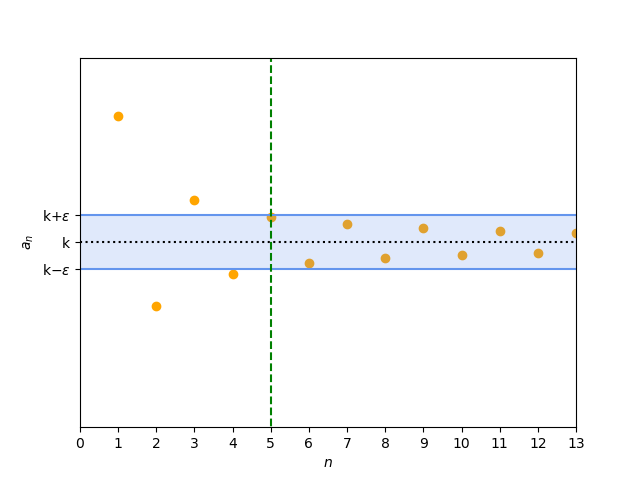

In [9]:
fig, ax = plt.subplots()
x = np.linspace(1,100,100)
y = (1/(x))*(-1)**x
fill_x = np.linspace(0,100,100)

eps = 0.25
b_u = x - x + eps
b_l = x - x -eps

upper = ax.plot(fill_x,b_u, c = 'cornflowerblue')[0]
lower = ax.plot(fill_x,b_l, c = 'cornflowerblue')[0]
e_line = ax.plot([0.5,0.5], [-5,5], c = 'green', linestyle = '--')[0]

plt.xlabel(r'$n$')
plt.ylabel(r'$a_n$')
plt.xticks(np.arange(0, 100, 1))
ax.set_yticks([-eps,0,eps])
ax.set_yticklabels(['k' + r'$- \epsilon$','k','k' + r'$+ \epsilon$'])
ax.plot([0,100],[0,0], c = 'black', linestyle = 'dotted')

ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
ax.scatter(x,y, c='orange')
ax.fill_between(fill_x, b_u, b_l, facecolor='cornflowerblue', alpha = 0.2)

def animate(i):
    l = 0
    if i > 30:
        l = (i - 30)/6
    y_lim = 1.5
    v = i*(eps-0.05)/frm
    if i > 10:
        y_lim -= v
    first = 4
    for n in x:
        if abs(1/n) <= eps -v:
            first = n
            break
    upper.set_data([0,100],[eps-v,eps-v])
    lower.set_data([0,100],[-eps+v,-eps+v])
    e_line.set_data([first,first], [-5,5])
    b_u = x - x + eps - v
    b_l = x - x -eps + v
    ax.collections.clear()
    ax.scatter(x,y, c='orange')
    ax.fill_between(fill_x, b_u, b_l, facecolor='cornflowerblue', alpha = 0.2)
    ax.set_xlim(0 + l, 10+ i/6)
    ax.set_ylim(y_lim, -y_lim)
    ax.set_yticks([-eps+v,0,eps-v])
    ax.set_yticklabels(['k' + r'$+ \epsilon$','k','k' + r'$- \epsilon$'])

    
frm = 100

# no blitting here because we redraw the axis to change the scale
# this will likely not make a noticeable difference on most hardware anyway
anim = FuncAnimation(fig, animate, init_func=None, frames=frm, interval=70, blit=False)
# anim.save('limit.gif',writer='ffmpeg',dpi=dpi)

Below illustrates the forward approximation to the 1st derivative.

<IPython.core.display.Javascript object>


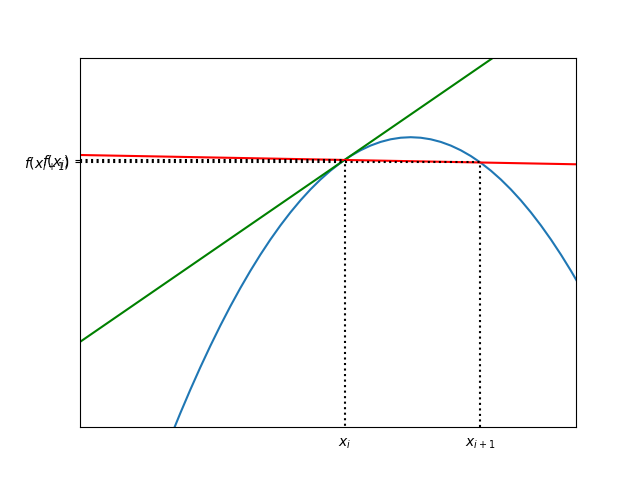

In [10]:
fig, ax = plt.subplots()

x= np.linspace(-10,20,100)
y = (x+1)*(1-x)
ax.plot(x,y)

h = 5
m = ((-2+h+1)*(1-(-2+h)) +3)/h
c = 2*m-3

x_line = np.linspace(-10,20,100)
y_line = m*x_line + c

d_y = 4*x_line + 5


ax.plot(x_line,d_y,c = 'green')

ax.set_xlim(-10, 5)
ax.set_ylim(-50, 15)
approx = ax.plot(x_line,y_line, c = 'red')[0]

plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,
    left = True,
    top=False,         
    labelbottom=True,
    labelleft=True)

xdot_1 = ax.plot([-2,-2],[-100,-3], linestyle = 'dotted', c = 'black')[0]
xdot_2 = ax.plot([-2+h,-2+h],[-50,(-2+h+1)*(1-(-2+h))], linestyle = 'dotted', c = 'black')[0]
ydot_1 = ax.plot([-10,-2],[-3,-3], linestyle = 'dotted', c = 'black')[0]
ydot_2 = ax.plot([-10,-2+h],[(-2+h+1)*(1-(-2+h)),(-2+h+1)*(1-(-2+h))], linestyle = 'dotted', c = 'black')[0]

def animate(i):
    new_h = h - h*i/(frm+1)
    new_m = ((-2+new_h+1)*(1-(-2+new_h)) +3)/new_h
    new_c = 2*new_m-3
    y_line = new_m*x_line + new_c
    approx.set_data(x_line,y_line)
    xdot_2.set_data([-2+new_h,-2+new_h],[-50,(-2+new_h+1)*(1-(-2+new_h))])
    ydot_2.set_data([-10,-2+new_h],[(-2+new_h+1)*(1-(-2+new_h)),(-2+new_h+1)*(1-(-2+new_h))])
    ax.set_yticks([-3,(-2+new_h+1)*(1-(-2+new_h))])
    ax.set_yticklabels([r'$f(x_i)$', r'$f(x_{i+1})$'])
    ax.set_xticks([-2,-2+new_h])
    ax.set_xticklabels([r'$x_i$', r'$x_{i+1}$'])
    
frm = 100

# no blitting here because we redraw the axis ticks
# this will likely not make a noticeable difference on most hardware anyway
anim = FuncAnimation(fig, animate, frames=frm, interval=70, blit=False)
# anim.save('forward_derivative.gif',writer='ffmpeg',dpi=dpi)

Below illustrates the backward approximation to the 1st derivative.

<IPython.core.display.Javascript object>


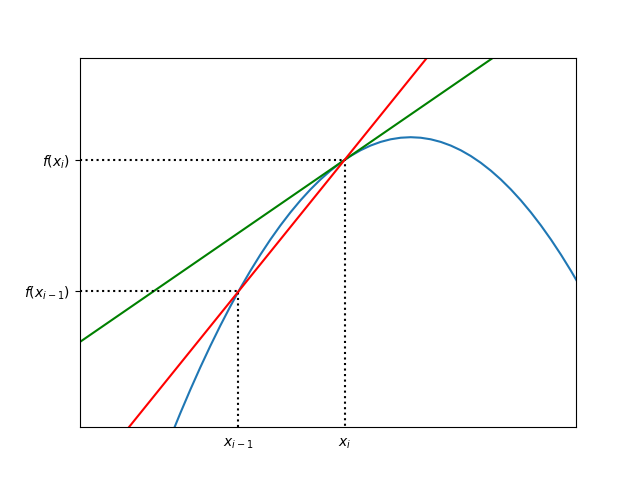

In [11]:
fig, ax = plt.subplots()

x= np.linspace(-10,20,100)
y = (x+1)*(1-x)
ax.plot(x,y)

h = 4
m = ((-2-h+1)*(1-(-2-h)) +3)/-h
c = 2*m-3

x_line = np.linspace(-10,20,100)
y_line = m*x_line + c

d_y = 4*x_line + 5
ax.plot(x_line,d_y,c = 'green')


xdot_1 = ax.plot([-2,-2],[-100,-3], linestyle = 'dotted', c = 'black')[0]
xdot_2 = ax.plot([-2-h,-2-h],[-50,(-2-h+1)*(1-(-2-h))], linestyle = 'dotted', c = 'black')[0]
ydot_1 = ax.plot([-10,-2],[-3,-3], linestyle = 'dotted', c = 'black')[0]
ydot_2 = ax.plot([-10,-2-h],[(-2-h+1)*(1-(-2-h)),(-2-h+1)*(1-(-2-h))], linestyle = 'dotted', c = 'black')[0]

ax.set_xlim(-10, 5)
ax.set_ylim(-50, 15)
approx = ax.plot(x_line,y_line, c = 'red')[0]


plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,
    left = True,
    top=False,         
    labelbottom=True,
    labelleft=True) 

def animate(i):
    new_h = h - h*i/(frm+1)
    new_m = ((-2-new_h+1)*(1-(-2-new_h)) +3)/-new_h
    new_c = 2*new_m-3
    y_line = new_m*x_line + new_c
    approx.set_data(x_line,y_line)
    xdot_2.set_data([-2-new_h,-2-new_h],[-50,(-2-new_h+1)*(1-(-2-new_h))])
    ydot_2.set_data([-10,-2-new_h],[(-2-new_h+1)*(1-(-2-new_h)),(-2-new_h+1)*(1-(-2-new_h))])
    ax.set_yticks([-3,(-2-new_h+1)*(1-(-2-new_h))])
    ax.set_yticklabels([r'$f(x_i)$', r'$f(x_{i-1})$'])
    ax.set_xticks([-2,-2-new_h])
    ax.set_xticklabels([r'$x_i$', r'$x_{i-1}$'])
    
frm = 100

# no blitting here because we redraw the axis ticks
# this will likely not make a noticeable difference on most hardware anyway
anim = FuncAnimation(fig, animate, frames=frm, interval=70, blit=False)
# anim.save('backward_derivative.gif',writer='ffmpeg',dpi=dpi)

Below illustrates the centered approximation to the 1st derivative.

<IPython.core.display.Javascript object>


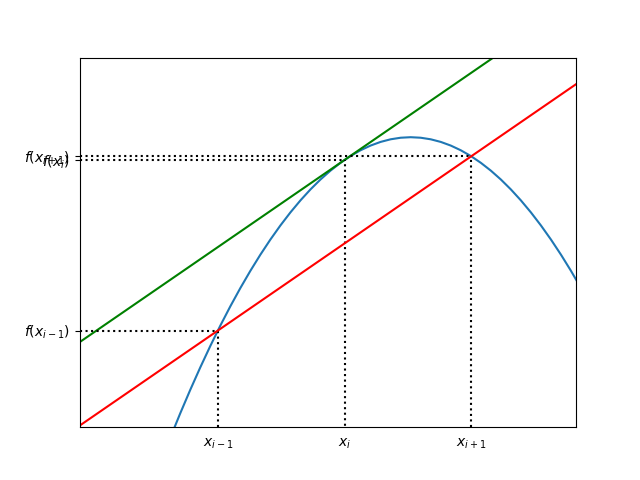

In [12]:
fig, ax = plt.subplots()

x= np.linspace(-10,20,100)
y = (x+1)*(1-x)
ax.plot(x,y)

h = 4.5
m = ((-2+h+1)*(1-(-2+h))-(-2-h+1)*(1-(-2-h)))/(2*h)
c = -3*m-8

x_line = np.linspace(-10,20,100)
y_line = m*x_line + c

d_y = 4*x_line + 5
ax.plot(x_line,d_y,c = 'green')


xdot_0 = ax.plot([-2,-2],[-100,-3], linestyle = 'dotted', c = 'black')[0]
ydot_0 = ax.plot([-10,-2],[-3,-3], linestyle = 'dotted', c = 'black')[0]
xdot_1 = ax.plot([-2-h,-2-h],[-50,(-2-h+1)*(1-(-2-h))], linestyle = 'dotted', c = 'black')[0]
ydot_1 = ax.plot([-10,-2-h],[(-2-h+1)*(1-(-2-h)),(-2-h+1)*(1-(-2-h))], linestyle = 'dotted', c = 'black')[0]
xdot_2 = ax.plot([-2+h,-2+h],[-50,(-2+h+1)*(1-(-2+h))], linestyle = 'dotted', c = 'black')[0]
ydot_2 = ax.plot([-10,-2+h],[(-2+h+1)*(1-(-2+h)),(-2+h+1)*(1-(-2+h))], linestyle = 'dotted', c = 'black')[0]

ax.set_xlim(-10, 5)
ax.set_ylim(-50, 15)
approx = ax.plot(x_line,y_line, c = 'red')[0]

plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,
    left = True,
    top=False,         
    labelbottom=True,
    labelleft=True) 


def animate(i):
    new_h = h - h*i/(frm+1)
    new_m = ((-2+new_h+1)*(1-(-2+new_h))-(-2-new_h+1)*(1-(-2-new_h)))/(2*new_h)
    new_c = 1-(-2+new_h)**2-new_m*(-2+new_h)
    y_line = new_m*x_line + new_c
    approx.set_data(x_line,y_line)
    xdot_2.set_data([-2+new_h,-2+new_h],[-50,(-2+new_h+1)*(1-(-2+new_h))])
    ydot_2.set_data([-10,-2+new_h],[(-2+new_h+1)*(1-(-2+new_h)),(-2+new_h+1)*(1-(-2+new_h))])
    xdot_1.set_data([-2-new_h,-2-new_h],[-50,(-2-new_h+1)*(1-(-2-new_h))])
    ydot_1.set_data([-10,-2-new_h],[(-2-new_h+1)*(1-(-2-new_h)),(-2-new_h+1)*(1-(-2-new_h))])
    ax.set_yticks([(-2-new_h+1)*(1-(-2-new_h)),-3,(-2+new_h+1)*(1-(-2+new_h))])
    ax.set_yticklabels([r'$f(x_{i-1})$',r'$f(x_i)$', r'$f(x_{i+1})$'])
    ax.set_xticks([-2-new_h,-2,-2+new_h])
    ax.set_xticklabels([r'$x_{i-1}$',r'$x_i$', r'$x_{i+1}$'])
    
frm = 100

# no blitting here because we redraw the axis ticks
# this will likely not make a noticeable difference on most hardware anyway
anim = FuncAnimation(fig, animate, frames=frm, interval=70, blit=False)
# anim.save('centered_derivative.gif',writer='ffmpeg',dpi=dpi)

Below illustrates the Riemann integral.

<IPython.core.display.Javascript object>


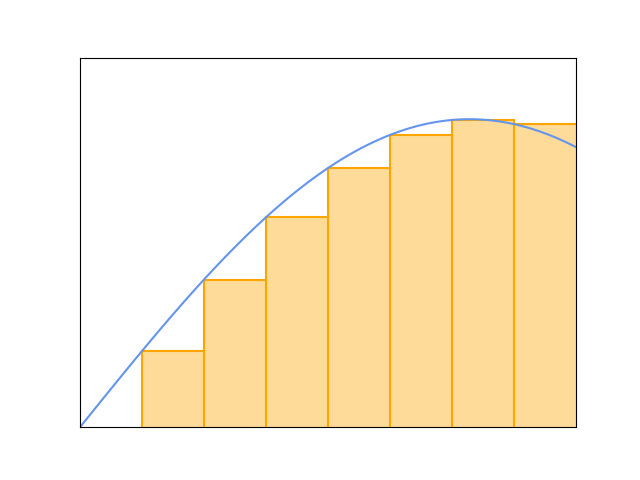

In [13]:
fig, ax = plt.subplots()

x = np.linspace(0,2,100)
y = np.sin(x)

ax.plot(x,y, c='cornflowerblue')
ax.set_xlim(0, 2)
ax.set_ylim(0, 1.2)
plt.tick_params(axis='both', which='both', bottom=False, left = False, top=False, labelbottom = False, labelleft = False) 
ax.plot(x,y, c = 'cornflowerblue')


def populate(n):
    x = []
    d = 2/(n+1)
    for i in range(n+1):
        x.append((i+1)*d)
    for j in range(len(x)-1):
        if j == 0:
            line = ax.plot([x[j],x[j]],[0,np.sin(x[j])], c = 'orange')[0]
        else:
            line = ax.plot([x[j],x[j]],[0,max(np.sin(x[j]),np.sin(x[j-1]))], c = 'orange')[0]
    for j in range(len(x)-1):
        line = ax.plot([x[j],x[j+1]],[np.sin(x[j]),np.sin(x[j])], c = 'orange')[0]
        ax.fill_between([x[j],x[j+1]], [np.sin(x[j]),np.sin(x[j])], facecolor='orange', alpha = 0.4)


def animate(i):    
    if i % 5 == 0:
        k = i/5 + 1
        ax.collections.clear()
        ax.lines.clear()       
        populate(int(k))
        ax.plot(x,y, c = 'cornflowerblue')
    


frm = 200

# no blitting as we redraw almost everything every few frames
anim = FuncAnimation(fig, animate, frames=frm, init_func = None, interval=70, blit=False)
# anim.save('Riemann_integral.gif',writer='ffmpeg',dpi=dpi)

### Interpolation animations <a class="anchor" id="int"></a>

Below illustrates the pathological behaviour of $\sin(1/x)$ around zero.

<IPython.core.display.Javascript object>


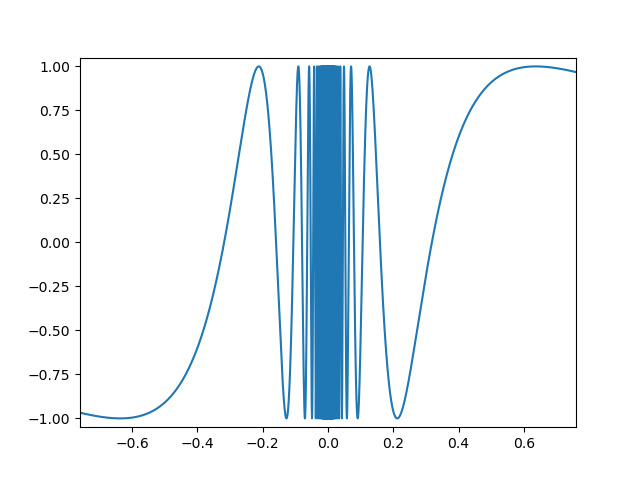

In [14]:
fig, ax = plt.subplots()
x = np.linspace(-1,1,1000000)
index = np.argwhere(x==0)
np.delete(x,index)
y = np.sin(1/x)
ax.plot(x,y)

def animate(i):
    xmin = -1 + i*.005
    xmax = 1 - i*.005
    plt.axis([xmin,xmax,-1.05,1.05])
    
anim = FuncAnimation(fig, animate,
                        frames=200, interval=20, blit=False)

# no blitting here because we redraw the axis ticks
# this will likely not make a noticeable difference on most hardware anyway
# anim.save('sin.gif',writer='ffmpeg',dpi=dpi)

Below illustrates the effect of $x$-value spacing on the interpolating polynomial.

<IPython.core.display.Javascript object>


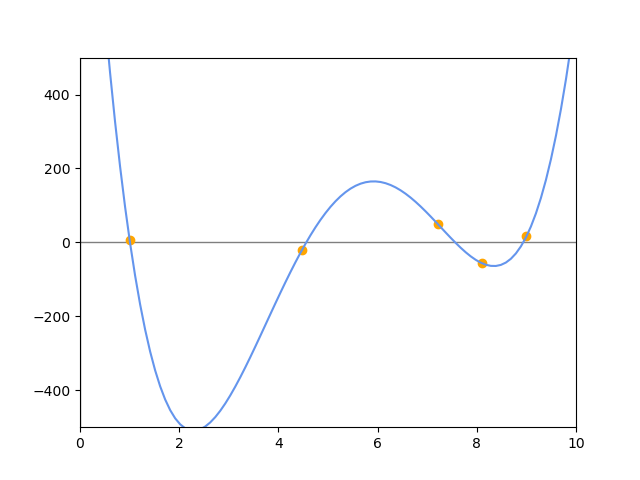

In [15]:
def Lpoly(x_var, x_values, y_values): # finds value of interpolating polynomial at x_var by using Lagranges form.
    result = 0
    for i in range(0, len(x_values)):
        block = 1
        for j in range(0, len(x_values)):
            if i != j:
                block *= (x_var - x_values[j]) / (x_values[i] - x_values[j])
        result += y_values[i]*block
    return result

fig, ax = plt.subplots() 


x_points = [1,5,8,8.5,9]
y_points = [7,5,24,-30,16]


x = np.linspace(0,10,100)
y = Lpoly(x,x_points,y_points)

artists = []

def init():
    for i in range(5):
        point, = plt.plot([], [], color='orange', marker="o")
        artists.append(point)
    line = ax.plot([],[], c = 'cornflowerblue')[0]
    artists.append(line)
    artists[0].set_data(x_points[0], y_points[0])
    artists[-2].set_data(x_points[-1], y_points[-1])
    return artists
    

def animate(i):
    x_points[1] = 5 - 2*i/frm
    x_points[2] = 8 - 3*i/frm
    x_points[3] = 8.5 - 1.5*i/frm
    y_points[1] = 5 - 100*i/frm
    y_points[2] = 24 + 100*i/frm
    y_points[3] = -30 - 100*i/frm
    artists[1].set_data(x_points[1], y_points[1])
    artists[2].set_data(x_points[2], y_points[2])
    artists[3].set_data(x_points[3], y_points[3])
    y = Lpoly(x,x_points,y_points)
    artists[-1].set_data(x,y)
    return artists
    
ax.axhline(y=0, color='k', linewidth=1, alpha = 0.5)
ax.axvline(x=0, color='k', linewidth=1, alpha = 0.5)
ax.set_xlim(0, 10)
ax.set_ylim(-500, 500)

frm = 250

anim = FuncAnimation(fig, animate, frames=frm, init_func = init, interval=20, blit=True)


# anim.save('spacing.gif',writer='ffmpeg',dpi=dpi)

Below demonstrates the decomposition of the interpolating quadratic into the three Lagrange basis polynomials. 

<IPython.core.display.Javascript object>


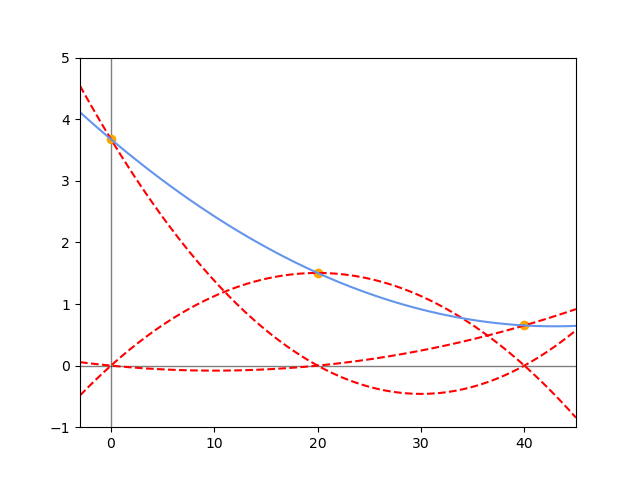

In [16]:
def Lpoly(x_var, x_values, y_values): # finds value of interpolating polynomial at x_var by using Lagranges form.
    result = 0
    for i in range(0, len(x_values)):
        block = 1
        for j in range(0, len(x_values)):
            if i != j:
                block *= (x_var - x_values[j]) / (x_values[i] - x_values[j])
        result += y_values[i]*block
    return result

fig, ax = plt.subplots() 

x_points = [0,20,40]
y_points = [3.85, 0.8, 0.212]
x = np.linspace(-3,45,100)

artists = []

def init():    
    for i in range(3):
        point, = plt.plot([], [], color='orange', marker="o")
        artists.append(point)
    for i in range(3):
        line = ax.plot([], [], c = 'red', linestyle = '--')[0]
        artists.append(line)
    artists.append(ax.plot([], [], c = 'cornflowerblue', linestyle = '-')[0])
    return artists

def animate(i):
    y_0 = y_points[0] - i/frm
    y_1 = y_points[1] + 4*i/frm
    y_2 = y_points[2] + 2.5*i/frm
    
    artists[0].set_data(x_points[0], y_0)
    artists[1].set_data(x_points[1], y_1)
    artists[2].set_data(x_points[2], y_2)
    
    y_a = Lpoly(x,x_points,[y_0,0,0])
    y_b = Lpoly(x,x_points,[0,y_1,0])
    y_c = Lpoly(x,x_points,[0,0,y_2])
    
    y = Lpoly(x,x_points,[y_0,y_1,y_2])
    artists[-1].set_data(x,y)
    artists[3].set_data(x,y_a)
    artists[4].set_data(x,y_b)
    artists[5].set_data(x,y_c)

    return artists
    
ax.axhline(y=0, color='k', linewidth=1, alpha = 0.5)
ax.axvline(x=0, color='k', linewidth=1, alpha = 0.5)
ax.set_xlim(-3, 45)
ax.set_ylim(-1, 5)

frm = 250

anim = FuncAnimation(fig, animate,
                        frames=frm, init_func= init, interval=20, blit=True)

# anim.save('Lagrange.gif',writer='ffmpeg',dpi=dpi)

Below illustrates Runge's phenomenon. 

<IPython.core.display.Javascript object>


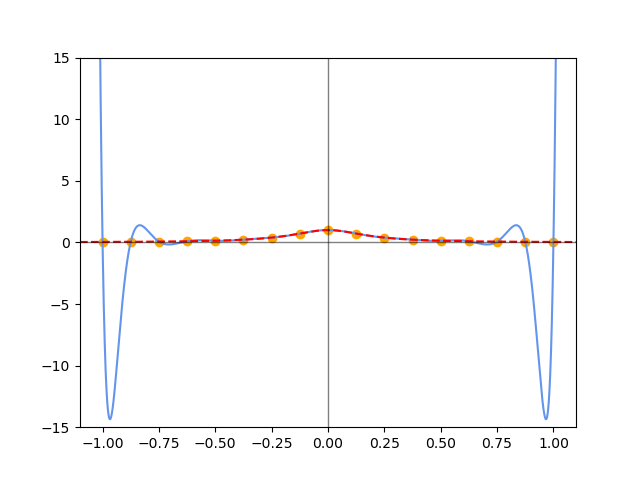

In [17]:
fig, ax = plt.subplots() 

x_0 = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
y_0 = []
for i in range(9):
    y_0.append(1/(1+25*x_0[i]**2))

lim_0 =[-1.1,1.5]
lim_1 = [-15,15]
lim_2 = [-5500,5500]
lim_3 = [-1000000,1000000]
x_1 = [-1,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1]
y_1 = []
for i in range(17):
    y_1.append(1/(1+25*x_1[i]**2))

x_2 = []
for i in range(17):
    x_2.append(x_1[i])
    if i != 16:
        x_2.append(55)
for i in range(33):
    if i % 2 == 1:
        x_2[i] = (x_2[i-1] + x_2[i+1])/2
    
y_2 = []
for i in range(33):
    y_2.append(1/(1+25*x_2[i]**2))
    
x_3 = []
for i in range(33):
    x_3.append(x_2[i])
    if i != 32:
        x_3.append(55)
for i in range(65):
    if i % 2 == 1:
        x_3[i] = (x_3[i-1] + x_3[i+1])/2

y_3 = []
for i in range(65):
    y_3.append(1/(1+25*x_3[i]**2))


x = np.linspace(-1.5,1.5,10000)

y_int = Lpoly(x,x_0,y_0)
y_func = 1/(1+25*x**2)
sc = ax.scatter(x_0, y_0, c = 'orange')
line = ax.plot(x,y_int, c = 'cornflowerblue')[0]
ax.plot(x,y_func, c = 'red', linestyle = '--')[0]  
ax.axhline(y=0, color='k', linewidth=1, alpha = 0.5)
ax.axvline(x=0, color='k', linewidth=1, alpha = 0.5)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(lim_0[0], lim_0[1])

frm = 200

def animate(i):
    if i > frm/4 and i <frm/2 :
        offsets = []
        for i in range(len(x_1)):
            offsets.append([x_1[i],y_1[i]])
        sc.set_offsets(offsets)
        y_int = Lpoly(x,x_1,y_1)
        line.set_data(x,y_int)
        ax.set_ylim(lim_1[0], lim_1[1])
    if i > frm/2 and i < 3*frm/4:
        offsets = []
        for i in range(len(x_2)):
            offsets.append([x_2[i],y_2[i]])
        sc.set_offsets(offsets)
        y_int = Lpoly(x,x_2,y_2)
        line.set_data(x,y_int)
        ax.set_ylim(lim_2[0], lim_2[1])
    if i > 3*frm/4:
        offsets = []
        for i in range(len(x_3)):
            offsets.append([x_3[i],y_3[i]])
        sc.set_offsets(offsets)
        y_int = Lpoly(x,x_3,y_3)
        line.set_data(x,y_int)
        ax.set_ylim(lim_3[0], lim_3[1])

# no blitting here because we redraw the axis ticks
# this will likely not make a noticeable difference on most hardware anyway
anim = FuncAnimation(fig, animate,
                        frames=frm, interval=40, blit=False)

# anim.save('Runge.gif',writer='ffmpeg',dpi=dpi)